**Analysis infomation for recollecting DS-All dataset.**
> Di Meng: di.meng@ucdconnect@ie \
Tue 28, 2023

In [35]:
import pandas as pd
import numpy as np
import os

from domain.scop2 import scop2df, scopcla, separate_UNIreg, separate_PDBreg

from params import *
from utils.common import load_tab, save_tab, dump_dict2json, read_json2dict
from loop.pdb_files import get_PDBfiles, parse_mmcif

In [37]:
ROOT = os.path.realpath('..')
path_recollectDsAll = os.path.join(ROOT, 'data/recollect_dsAll')
path_originDsAll = os.path.join(ROOT, 'data/origin_dsAll')

# original files
path_scop_folder = os.path.join(path_recollectDsAll, 'scop2')
path_scop = os.path.join(path_scop_folder, 'scop-cla-latest.txt')
path_scop_pdbchain = os.path.join(path_scop_folder, 'scop-represented-structures-latest.txt')
path_scop169 = os.path.join(path_originDsAll, 'scop-cla-1.69.txt')
path_scop175 = os.path.join(path_originDsAll, 'scop-cla-1.75.txt')

# generated files
path_tab_scop = os.path.join(path_scop_folder, 'scop-cla-latest-table.tsv')
path_tab_scop_FA_domain = os.path.join(path_scop_folder, 'scop-cla-latest-table-FAdomain.tsv')
path_tab_scop_FA_continuous_domain = os.path.join(path_scop_folder, 'scop-cla-latest-table-FAcontinuousDomain.tsv')
# path_tab_scop_FA_continuous_uni_domain = os.path.join(path_scop_folder, 'scop-cla-latest-table-FAcontinuousUniDomain.tsv') # match with UNIprot
# path_tab_scop_FA_continuous_uni_multi_domian = os.path.join(path_scop_folder, 'scop-cla-latest-table-FAcontinuousUniMultiDomain.tsv')

# New multi-domain

# Step1. Domain data collection -skippable
> Database SCOP2.

## SCOP 1.*
**Tree structure**
> 1.69 \
1.75

In [9]:
df_scop169 = pd.read_csv(path_scop169, sep='\t', skiprows=4, header=None)
df_scop169 = pd.read_csv(path_scop169, sep='\t', skiprows=4, header=None)
df_scop169[:3]

,0,1,2,3,4,5
0,d1dlwa_,1dlw,A:,a.1.1.1,14982,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
1,d1uvya_,1uvy,A:,a.1.1.1,100068,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
2,d1dlya_,1dly,A:,a.1.1.1,14983,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."


In [10]:
df_scop169

,0,1,2,3,4,5
0,d1dlwa_,1dlw,A:,a.1.1.1,14982,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
1,d1uvya_,1uvy,A:,a.1.1.1,100068,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
2,d1dlya_,1dly,A:,a.1.1.1,14983,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
3,d1uvxa_,1uvx,A:,a.1.1.1,100067,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
4,d1s69a_,1s69,A:,a.1.1.1,105305,"cl=46456,cf=46457,sf=46458,fa=46459,dm=46460,s..."
...,...,...,...,...,...,...
70854,d1tjbb_,1tjb,B:,k.44.1.1,107025,"cl=58788,cf=111554,sf=111555,fa=111556,dm=1115..."
70855,d1vl3a_,1vl3,A:,k.39.1.1,108716,"cl=58788,cf=90314,sf=90315,fa=90316,dm=90317,s..."
70856,d1vl3b_,1vl3,B:,k.39.1.1,108717,"cl=58788,cf=90314,sf=90315,fa=90316,dm=90317,s..."
70857,d1pbza_,1pbz,A:,k.39.1.1,94424,"cl=58788,cf=90314,sf=90315,fa=90316,dm=103800,..."


## SCOP2
**acyclic graph, Complated than tree structure**
>SCOP release 2022-06-29 \
http://scop.mrc-lmb.cam.ac.uk \
based on PDB release 2022-06-17 \
based on UniProt realese 2022-05-25 \
based on SIFTS release 2022-06-11

### 1. Load data -- skippable

#### Load data to DataFrame

In [38]:
df_scop = scop2df(path_scop)

length of df_scop: 36900


#### separate SCOPCLA column

In [ ]:
df_scop[:3]

df_scop[df_scop['FA-PDBID']=='1F1U']

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,SF-DOMID,SF-PDBID,SF-PDBREG,SF-UNIID,SF-UNIREG,SCOPCLA
30841,8032047,1F1U,A:2-147,H0QJ69,2-147,8044425,1F1U,A:2-147,H0QJ69,2-147,"TP=1,CL=1000003,CF=2000478,SF=3000739,FA=4001093"
30842,8032048,1F1U,A:148-323,H0QJ69,148-323,8044426,1F1U,A:148-323,H0QJ69,148-323,"TP=1,CL=1000003,CF=2000478,SF=3000739,FA=4001093"


In [40]:
# UNIID & PDBID between FA and SF are the same.
print(sum(df_scop['FA-PDBID']==df_scop['SF-PDBID']), sum(df_scop['FA-UNIID']==df_scop['SF-UNIID']))
print(sum(df_scop['FA-DOMID']==df_scop['SF-DOMID']))
print(len(df_scop['FA-DOMID'].unique()), len(df_scop['SF-DOMID'].unique()))
print(len(df_scop['SF-PDBID'].unique()), len(df_scop['FA-PDBID'].unique()))

36900 36900
0
35644 36900
27530 27530


In [41]:
df_scopcla = scopcla(df_scop)

In [17]:
len(df_scopcla['TP'].unique()), len(df_scopcla['CL'].unique()), len(df_scopcla['CF'].unique()), len(df_scopcla['SF'].unique()), len(df_scopcla['FA'].unique())

(4, 5, 1579, 2816, 5936)

#### Save scop tablar data

In [18]:
df_scopcla.to_csv(path_tab_scop, sep='\t', index=False)

### !Skip! How to deal with the multipule definations of protein_domains: Family and Superfamily
!!! **Ignore** this part currently, using Family domain defination !!!

#### Is Domain region the same between FA-REG and SF-REG for single SF domains?
> Yes

**Domains with one FA and one SF**, domain regions for FA and SF are the same.

In [19]:
# count the domains that have one FA match to multiple SFs
fa_count = df_scopcla.groupby('FA-DOMID').count()
fa_2more_sf = (fa_count[fa_count['FA-PDBID']>1]).index
df_scop_2more_sf = df_scopcla[df_scopcla['FA-DOMID'].isin(fa_2more_sf)].sort_values(by=['FA-PDBID', 'FA-DOMID'])
df_scop_1_sf = df_scopcla[~df_scopcla['FA-DOMID'].isin(fa_2more_sf)].sort_values(by=['FA-PDBID', 'FA-DOMID'])

df_scop_2more_sf.shape[0], df_scop_1_sf.shape[0]

(2369, 34531)

In [20]:
sum(df_scop_1_sf['FA-UNIREG'] == df_scop_1_sf['SF-UNIREG'])

32504

#### Domains with one FA but with Multiple SF, are SF-REGs add together equal to FA-REG
e.g. 1A1D, SF-UNIREG_1 (1-61) + SF-UNIREG_2 (94-146) -> FA-UNIREG(1-146)

In [21]:
# difference domain boundaries between family and superfamily
fa_groups = df_scop_2more_sf.groupby(['FA-DOMID'], group_keys=True)
group_names = fa_groups.groups.keys()
len(group_names)

1113

In [22]:
fa = fa_groups.get_group(8000813)
fa['FA-UNIREG'].values[0]

/tmp/ipykernel_960002/496777174.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  fa = fa_groups.get_group(8000813)


'2-374'

In [23]:
list_sf_domains = []
list_fa_domains = []

list_sum_reg_len = []

for fa_domid in group_names:
    fa = fa_groups.get_group(fa_domid)
    sf_len = 0

    for region, domid in zip(fa['SF-UNIREG'].values, fa['SF-DOMID'].values):
        for r in region.split(','):
            se = r.split('-')
            s = int(se[0])
            e = int(se[1])
            sf_len += e - s +1

            # SF domains
            dict_sf_domain = {}
            dict_sf_domain['SF-DOMID'] = domid
            dict_sf_domain['SF-UNIREG-START'] = s
            dict_sf_domain['SF-UNIREG-END'] = e

            list_sf_domains.append(dict_sf_domain)
    
    # fa_domain
    fa_region = fa['FA-UNIREG'].values[0]
    fa_len = 0
    for r in fa_region.split(','):
        se = r.split('-')
        s = int(se[0])
        e = int(se[1])
        
        fa_len += e - s +1
                
        # FA domains
        dict_fa_domain = {}
        dict_fa_domain['FA-DOMID'] = fa['FA-DOMID'].values[0]
        # dict_fa_domain['SF-UNIREG-FASTART'] = start
        # dict_fa_domain['SF-UNIREG-FAEND'] = end

        dict_fa_domain['FA-UNIREG-START'] = s
        dict_fa_domain['FA-UNIREG-END'] = e

        list_fa_domains.append(dict_fa_domain)
        
    # sum of region length
    list_sum_reg_len.append({'FA-DOMID': fa['FA-DOMID'].values[0],
                             'sf_reg_sum': sf_len,
                             'fa_reg_sum': fa_len})

/tmp/ipykernel_960002/178009773.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  fa = fa_groups.get_group(fa_domid)


In [24]:
#list_sf_domains
sf_domain_seg = pd.DataFrame(list_sf_domains)
sf_domain_seg

,SF-DOMID,SF-UNIREG-START,SF-UNIREG-END
0,8000815,31,164
1,8000814,165,374
2,8000823,22,112
3,8000822,113,327
4,8056190,309,402
...,...,...,...
2485,8106422,97,297
2486,8106430,60,96
2487,8106432,298,329
2488,8107024,1763,1880


In [25]:
# list_fa_domains
fd_domain_seg = pd.DataFrame(list_fa_domains)

In [26]:
df_scopcla[df_scopcla['FA-PDBID']=='1SFX']

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,SF-DOMID,SF-PDBID,SF-PDBREG,SF-UNIID,SF-UNIREG,SCOPCLA,TP,CL,CF,SF,FA
4844,8002798,1SFX,A:1-106,O28271,1-106,8002799,1SFX,A:17-80,O28271,17-80,"TP=1,CL=1000003,CF=2000144,SF=3000034,FA=4000158",1,1000003,2000144,3000034,4000158


In [27]:
len_fa_sf = pd.DataFrame(list_sum_reg_len)
len_fa_sf.shape[0], len_fa_sf[:3]

(1113,
    FA-DOMID  sf_reg_sum  fa_reg_sum
 0   8000813         344         373
 1   8000821         306         326
 2   8001154         323         402)

In [28]:
sum(len_fa_sf['sf_reg_sum'] == len_fa_sf['fa_reg_sum']), sum(len_fa_sf['sf_reg_sum'] < len_fa_sf['fa_reg_sum'])

(494, 619)

### 2. Family domains

In [29]:
df_scopcla = pd.read_csv(path_tab_scop, sep='\t')
fa_columns = ['FA-DOMID', 'FA-PDBID', 'FA-PDBREG', 'FA-UNIID', 'FA-UNIREG']
df_scopfa = df_scopcla[fa_columns]
df_scopfa.shape[0], df_scopfa.drop_duplicates().shape[0], len(df_scopfa['FA-DOMID'].unique())

(36900, 35644, 35644)

#### Drop duplicates
Caused by superfamily domain defination.

In [30]:
df_scopfa = df_scopfa.drop_duplicates()
df_scopfa.shape[0], df_scopfa[:3]

(35644,
    FA-DOMID FA-PDBID    FA-PDBREG FA-UNIID  FA-UNIREG
 0   8045703     3H8D  C:1143-1264   Q64331  1143-1264
 1   8094330     6J56  A:1158-1282   Q9UM54  1167-1291
 2   8017835     3FKQ      A:1-116   D0VX10      1-116)

#### Add Start, End and ChainID of domains to the table

In [31]:
n_faDomain = separate_PDBreg(df_scopfa).shape[0]
print(f'Number of familay-level domains: {n_faDomain}')

Number of familay-level domains: 36003


In [32]:
fa_domains = df_scopfa.merge(separate_UNIreg(df_scopfa), on='FA-DOMID', how='left')
fa_domains = fa_domains.merge(separate_PDBreg(df_scopfa), on='FA-DOMID', how='left')
# fa_domains = df_scopfa.merge(separate_PDBreg(df_scopfa), on='FA-DOMID', how='left')
fa_domains.shape[0], fa_domains.columns, 'check section 3 for the weird number here! One pdb-chain maps to multiple Uniprot regions since they are discontinuous domains'

(36723,
 Index(['FA-DOMID', 'FA-PDBID', 'FA-PDBREG', 'FA-UNIID', 'FA-UNIREG',
        'FA-UNIREG-START', 'FA-UNIREG-END', 'FA-PDBREG-START', 'FA-PDBREG-END',
        'FA-CHAINID'],
       dtype='object'),
 'check section 3 for the weird number here! One pdb-chain maps to multiple Uniprot regions since they are discontinuous domains')

In [33]:
print(f"The number of chains: {len(fa_domains.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}")

The number of chains: 31477


#### Save family domains

In [34]:
fa_domains.to_csv(path_tab_scop_FA_domain, sep='\t', index=False)

### 3. why FA-DOMID map to more than one FA-UNIREG? - Uncontinuous domains
> Yes, they are uncontinuous domains\
Drop uncontinuous doamins

In [35]:
fa_domains = pd.read_csv(path_tab_scop_FA_domain, sep='\t')
uncontinuous_domain = fa_domains.groupby('FA-DOMID').filter(lambda x: len(x)>1).sort_values(by='FA-DOMID')
uncontinuousD_uniid = uncontinuous_domain['FA-UNIID'].unique()
continuous_domain = fa_domains[~fa_domains['FA-UNIID'].isin(uncontinuousD_uniid)]

print(f"Number of PDBID that contains uncontinuous domain vs only continuous-domain PDBID: \n{len(uncontinuousD_uniid), len(continuous_domain['FA-UNIID'].unique())}")

Number of PDBID that contains uncontinuous domain vs only continuous-domain PDBID: 
(335, 29989)


In [36]:
fa_domains[fa_domains['FA-UNIID'].isin(uncontinuousD_uniid)].sort_values('FA-DOMID')

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID
6690,8001399,2BCG,"G:5-127,G:230-446",P39958,"5-127,230-446",5,127,230,446,G
6691,8001399,2BCG,"G:5-127,G:230-446",P39958,"5-127,230-446",230,446,5,127,G
6692,8001399,2BCG,"G:5-127,G:230-446",P39958,"5-127,230-446",230,446,230,446,G
6689,8001399,2BCG,"G:5-127,G:230-446",P39958,"5-127,230-446",5,127,5,127,G
6697,8001442,2Z3Y,"A:274-419,A:521-831",O60341,"274-419,521-831",274,419,521,831,A
...,...,...,...,...,...,...,...,...,...,...
26495,8105571,7KIK,"A:61-137,A:1-44",A0A0F6N442,"8-84,85-128",85,128,61,137,A
26880,8106929,6WVB,"A:3-144,A:315-407",K0NYR4,"3-144,146-238",146,238,315,407,A
26879,8106929,6WVB,"A:3-144,A:315-407",K0NYR4,"3-144,146-238",146,238,3,144,A
26877,8106929,6WVB,"A:3-144,A:315-407",K0NYR4,"3-144,146-238",3,144,3,144,A


In [37]:
print(f"The number of chains: {len(continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}"), 31477-len(continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())

The number of chains: 31095


(None, 382)

#### Save continuous domain proteins

In [38]:
continuous_domain.to_csv(path_tab_scop_FA_continuous_domain, sep='\t', index=False)

### Number of proteins

In [39]:
print(f"Number of all proteins: {len(fa_domains['FA-UNIID'].unique())}")
print(f"Number of noncontinuious-domain proteins: {len(uncontinuousD_uniid)}")
print(f"Number of continuious-domain proteins: {len(continuous_domain['FA-UNIID'].unique())}")

Number of all proteins: 30324
Number of noncontinuious-domain proteins: 335
Number of continuious-domain proteins: 29989


### !Skip! Superfamily domains - ignore this part, do not use the SF domain boundaries

In [31]:
'''
sf_columns = ['SF-DOMID', 'SF-PDBID', 'SF-PDBREG', 'SF-UNIID', 'SF-UNIREG', 'SF']
df_scopsf = df_scopcla[sf_columns]
df_scopsf.shape[0], df_scopsf.drop_duplicates().shape[0], len(df_scopsf['SF-DOMID'].unique())
'''

"\nsf_columns = ['SF-DOMID', 'SF-PDBID', 'SF-PDBREG', 'SF-UNIID', 'SF-UNIREG', 'SF']\ndf_scopsf = df_scopcla[sf_columns]\ndf_scopsf.shape[0], df_scopsf.drop_duplicates().shape[0], len(df_scopsf['SF-DOMID'].unique())\n"

#### Add Start and End of domains to the table

In [26]:
'''
sf_domains = df_scopsf.merge(separate_reg(df_scopsf, level='SF'), on='SF-DOMID', how='left')
sf_domains.shape[0]
'''

37409

### 4. PDB-Uniprot
> 1. import PDB chain infomation from scop-represented-structures-latest.txt (download from SCOP2 website) \
    ChainID do not match between **File: scop-des-latest.txt** and **File: scop-represented-structures-latest.txt**, ignore the first part
2. Delete Domain records that PDBID cannot fully match to UNIID

In [40]:
continuous_domain = pd.read_csv(path_tab_scop_FA_continuous_domain, sep='\t')
pdb_chain = pd.read_csv(path_scop_pdbchain, names=['DOMID', 'REPRESENTED-PDBID', 'REPRESENTED-PDBCHAIN'], header=None, comment='#', sep=' ')

#### Drop the records that cannot match to UNIProt

In [41]:
fa_uniid_all = continuous_domain['FA-UNIID'].unique()
fa_uniid_match = [x for x in fa_uniid_all if not ('_' in x)]
fa_uniid_partiallyMatch = [x for x in fa_uniid_all if ('_' in x)]

print(f'all: {len(fa_uniid_all)}, \nPDB chain paritially matches to Uniprot: {len(fa_uniid_partiallyMatch)}, \nPDB chain fully matches to Uniprot: {len(fa_uniid_match)}')

all: 29989, 
PDB chain paritially matches to Uniprot: 96, 
PDB chain fully matches to Uniprot: 29893


In [42]:
uni_continuous_domain = continuous_domain[continuous_domain['FA-UNIID'].isin(fa_uniid_match)]

In [43]:
print(f"The number of chains: {len(uni_continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}")

The number of chains: 31015


#### Drop the one pdb-chain can map to more that UNIProt sequence

In [44]:
# only keep chain can map to one Uniprot sequence
chain_more_uniprot = uni_continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).filter(lambda x: len(x['FA-UNIID'].unique())>1).index
uni_continuous_domain = uni_continuous_domain.drop(chain_more_uniprot)

In [45]:
print(f"The number of chains: {len(uni_continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}"), 31095-31002

The number of chains: 31002


(None, 93)

In [46]:
print(f"The number of the PDB-chain matches to one Uniprot: {len(chain_1_uniprot)}, \
      \nPDB chain map to more than one Uniprot: {len(fa_uniid_all) - len(chain_1_uniprot)} \
      \n64 chains of them are multi-domain chains")

NameError: name 'chain_1_uniprot' is not defined

#### save to file

In [47]:
uni_continuous_domain.to_csv(path_tab_scop_FA_continuous_uni_domain, index=False, sep='\t')

In [48]:
uni_continuous_domain[:3]

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID
0,8045703,3H8D,C:1143-1264,Q64331,1143-1264,1143,1264,1143,1264,C
1,8094330,6J56,A:1158-1282,Q9UM54,1167-1291,1167,1291,1158,1282,A
2,8017835,3FKQ,A:1-116,D0VX10,1-116,1,116,1,116,A


# Step2. multi-domain proteins

> Only cosider 27,198 **continuious-domain proteins**

In [49]:
uni_continuous_domain = pd.read_csv(path_tab_scop_FA_continuous_uni_domain, sep='\t')

### Complex -- skippable

A PDBID <-> multiple UNIID

In [50]:
# proteins with multiple FA-UNIIds 
m_PDBID = uni_continuous_domain.groupby('FA-PDBID').filter(lambda x: len(x)>1).sort_values('FA-PDBID')
df_complex = m_PDBID.groupby(['FA-PDBID', 'FA-UNIREG']).filter(lambda x: len(x)>1).sort_values('FA-PDBID')
complex_pdbid = df_complex['FA-PDBID'].unique()
print(f'Number of complexes (PDBID, UNIID): {len(complex_pdbid), df_complex.shape[0]}')
df_complex[:3]

Number of complexes (PDBID, UNIID): (27, 56)


,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID
24444,8023673,1CG5,A:1-141,P56691,2-142,2,142,1,141,A
24454,8023838,1CG5,B:1-141,P56692,2-142,2,142,1,141,B
18062,8025324,1OQS,B:1-133,Q02471,17-138,17,138,1,133,B


In [51]:
complex_pdbid

array(['1CG5', '1OQS', '1S6B', '1VQO', '1Y75', '2E74', '2QOG', '4UER',
       '4V6U', '4V6W', '4V8M', '4WVM', '5T2A', '5XY3', '6FXC', '6KGX',
       '6SPD', '6SPF', '6YSI', '7C9R', '7EXT', '7JIL', '7KSQ', '7OLD',
       '7OTC', '7QO6', '7R81'], dtype=object)

### protein with multiple domains ???
1. PDBID: multiple domain records for one PDBID, or \
2. UNIID: multiple domain records for one UNIID, or \
3. PDB-CHAIN: multiple domain records for one PDBID+ChainID (selected)

**Using PDB-CHAIN = PDBID + ChainID  currently, avoid complexes**

In [52]:
# proteins with multiple FA-DOMIDs 
uni_continuous_domain = pd.read_csv(path_tab_scop_FA_continuous_uni_domain, sep='\t')
multi_domain = uni_continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).filter(lambda x: len(x)>1).sort_values(['FA-PDBID', 'FA-CHAINID', 'FA-PDBREG-START'])
print('number of domains: ', multi_domain.shape[0])
print('number of multi-domain proteins: ', len(multi_domain['FA-UNIID'].unique()))

number of domains:  6595
number of multi-domain proteins:  2848


In [53]:
multi_domain[multi_domain['FA-PDBID'] == '1ES0']

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID
22737,8022365,1ES0,A:1B-82,P04228,26-109,26,109,1B,82,A
7967,8054688,1ES0,A:83-178,P04228,110-205,110,205,83,178,A


In [55]:
print(f"The number of chains: {len(multi_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}")
print(f"The number of PDB entries: {len(multi_domain.groupby(['FA-PDBID']).groups.keys())}")

The number of chains: 2867
The number of PDB entries: 2734


In [56]:
# proteins with multiple FA-DOMIDs 
uni_continuous_domain = pd.read_csv(path_tab_scop_FA_continuous_uni_domain, sep='\t')
nonMultiDomain = uni_continuous_domain.groupby(['FA-PDBID', 'FA-CHAINID']).filter(lambda x: len(x)<=1).sort_values(['FA-PDBID', 'FA-CHAINID', 'FA-PDBREG-START'])
print('number of domains: ', nonMultiDomain.shape[0])
print('number of multi-domain proteins: ', len(nonMultiDomain['FA-UNIID'].unique()))
print(f"The number of chains: {len(nonMultiDomain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())}")

number of domains:  28135
number of multi-domain proteins:  27211
The number of chains: 28135


#### Save multi-domain proteins to file

In [9]:
multi_domain.to_csv(path_tab_scop_FA_continuous_uni_multi_domian, sep='\t', index=False)

# Adjacent Domains - after 2_2_run_parsableDomain

## 1. generate domain distance - skippable

In [5]:
multi_domain = load_tab(path_tab_scop_FA_continuous_uni_multi_parse_domian)

list_pdbid = multi_domain['FA-PDBID'].unique()
len(list_pdbid), len(multi_domain['seq_id'].unique())

(2574, 2655)

In [6]:
len(set([f"{r['FA-PDBID']}_{r['FA-CHAINID']}" for _, r in multi_domain.iterrows()]))
len(multi_domain.groupby(['FA-PDBID', 'FA-CHAINID']).groups.keys())

2655

### 1.1. calculate domain distance

Consider the situation that \
> 1. one PDBID contains more than one chain; \
2. one chain contains more than two Domains;

In [7]:
multi_domain.groupby(['FA-PDBID', 'FA-CHAINID']).filter(lambda x: len(x)>2)[:3]

,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID,seq_id,length,experiment_type,resolution
14,8028309,1A65,A:1-131,Q9Y780,19-149,4002203,19,149,1,131,A,1a65_A,131,XRay,2.23
15,8028311,1A65,A:132-303,Q9Y780,150-321,4002203,150,321,132,303,A,1a65_A,172,XRay,2.23
16,8028312,1A65,A:304-504,Q9Y780,322-522,4002203,322,522,304,504,A,1a65_A,201,XRay,2.23


In [8]:
group_domain = multi_domain.groupby(['FA-PDBID'])

domain_dist_list = []

for pdbid in group_domain.groups.keys():
    chains = group_domain.get_group(pdbid).drop_duplicates()
    group_chain = chains.groupby(['FA-CHAINID'])
    for chainid in group_chain.groups.keys():
        chain = group_chain.get_group(chainid)
        chain = chain.sort_values('FA-UNIREG-START').reset_index(drop=True)
    
        # if two domains are right next to each other, the result is 0
        for i, row in chain.iterrows():
            if i==0:
                continue
                
            domain_dist = int(chain.loc[i, 'FA-PDBREG-START']) - int(chain.loc[i-1, 'FA-PDBREG-END']) - 1

            dist_dict = {}
            dist_dict['pdbid'] = pdbid
            dist_dict['chainid'] = chainid
            dist_dict['domain1'] = chain.loc[i-1, 'FA-DOMID']
            dist_dict['domain2'] = chain.loc[i, 'FA-DOMID']
            if domain_dist>0:
                dist_dict['start'] = chain.loc[i-1, 'FA-PDBREG-END']+1
                dist_dict['end'] = chain.loc[i, 'FA-PDBREG-START']-1
            else:
                dist_dict['start'] = -1
                dist_dict['end'] = -1

            dist_dict['dist'] = domain_dist

            domain_dist_list.append(dist_dict)
        
df_domain_dist = pd.DataFrame(domain_dist_list)

/tmp/ipykernel_446301/3303440423.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  chains = group_domain.get_group(pdbid).drop_duplicates()
/tmp/ipykernel_446301/3303440423.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  chain = group_chain.get_group(chainid)
/tmp/ipykernel_446301/3303440423.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  chains = group_domain.get_group(pdbid).drop_duplicates()
/tmp/ipykernel_446301/3303440423.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple

In [9]:
df_domain_dist[:3]

,pdbid,chainid,domain1,domain2,start,end,dist
0,1A04,A,8031657,8024262,143,149,7
1,1A0I,A,8024205,8029580,-1,-1,0
2,1A0P,A,8025375,8024580,101,110,10


### 1.2. Missing residues

In [10]:
# 1BBU is an example of doamin-distance are missing residues
df_domain_dist[df_domain_dist['dist']==6][:6]

,pdbid,chainid,domain1,domain2,start,end,dist
73,1BBU,A,8029538,8023521,155,160,6
258,1EA0,A,8056845,8056847,431,436,6
316,1F1E,A,8018997,8018998,75,80,6
399,1GKU,B,8023534,8055740,499,504,6
841,1N1T,A,8031606,8031605,407,412,6
921,1O59,A,8024845,8024848,188,193,6


In [ ]:
# an example with missing residues
pdbid = '1BBU'.lower()

In [11]:
def get_missing(path_pdb_cif, pdbid):
    path_cif = os.path.join(path_pdb_cif, pdbid + '.cif')
    pre_key = '_pdbx_unobs_or_zero_occ_residues.'
    tail_keys = ['auth_asym_id', 'auth_comp_id', 'auth_seq_id']

    # with or without missing residues
    try:
        df_missing = parse_mmcif(path_cif, pre_key, tail_keys)
        return df_missing
    except:
        
        return pd.DataFrame()

In [12]:
list_missing = []
for _, row in df_domain_dist.iterrows():
    pdbid = row['pdbid'].lower()
    if row['dist']==0:
        list_missing.append(0)
    else:
        df_missing = get_missing(path_pdb_cif, pdbid)
    
        if df_missing.empty:
            list_missing.append(0)
        
        elif (str(row['end']) in list(df_missing['auth_seq_id'])) & (str(row['start']) in list(df_missing['auth_seq_id'])):
            list_missing.append(1)
        else:
            list_missing.append(0)

In [13]:
df_domain_dist['missing'] = list_missing
save_tab(df_domain_dist, path_tab_scop_FA_continuous_uni_multi_parse_domian_dist)

In [15]:
len(df_domain_dist['pdbid'].unique())

2574

## 2. Analyzing

In [72]:
def color_generator():
    cls = [np.round(np.random.rand(),1), np.round(np.random.rand(),1),np.round(np.random.rand(),1), np.round(np.clip(np.random.rand(), 0, 1), 1)]
    return cls


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df_domain_dist = load_tab(path_tab_scop_FA_continuous_uni_multi_parse_domian_dist)

dist = df_domain_dist.loc[:, 'dist'].values
len(dist), sum(dist==0), sum(dist>0)

(3581, 2697, 884)

In [34]:
print(f'The longest domain distance: {max(dist)}')
# the longest domain distance
multi_domain[multi_domain['FA-PDBID']=='2EYQ']

The longest domain distance: 444


,FA-DOMID,FA-PDBID,FA-PDBREG,FA-UNIID,FA-UNIREG,FA,FA-UNIREG-START,FA-UNIREG-END,FA-PDBREG-START,FA-PDBREG-END,FA-CHAINID
3530,8027957,2EYQ,A:466-545,P30958,466-545,4001778,466,545,466,545,A
3531,8027960,2EYQ,A:990-1147,P30958,990-1147,4003810,990,1147,990,1147,A


([<matplotlib.axis.XTick at 0x7fc4c60dc250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

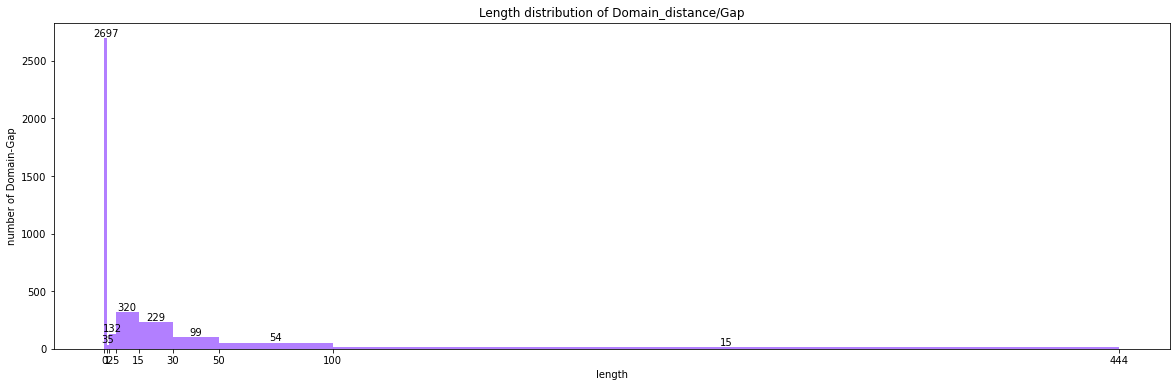

In [145]:

cls = [np.round(np.random.rand(),1), np.round(np.random.rand(),1),np.round(np.random.rand(),1), np.round(np.clip(np.random.rand(), 0, 1), 1)]
plt.figure(figsize=(20, 6))
bin_boundaries = [0, 1, 2, 5, 15, 30, 50, 100, 444]

counts, edges, bars = plt.hist(dist, bins=bin_boundaries, color=cls)
plt.title('Length distribution of Domain_distance/Gap')
plt.ylabel('number of Domain-Gap')
plt.xlabel('length')
plt.bar_label(bars)
plt.xticks(edges)

# plt.text(80, 500, 'Inter-Domain Linkers')

### 2.1. Plots

#### 2.1.1. All Domain-Domain gaps

In [ ]:
def bar_chart(dist, boundries):
    '''
    Plot 
    '''

Text(0.5, 0, 'length')

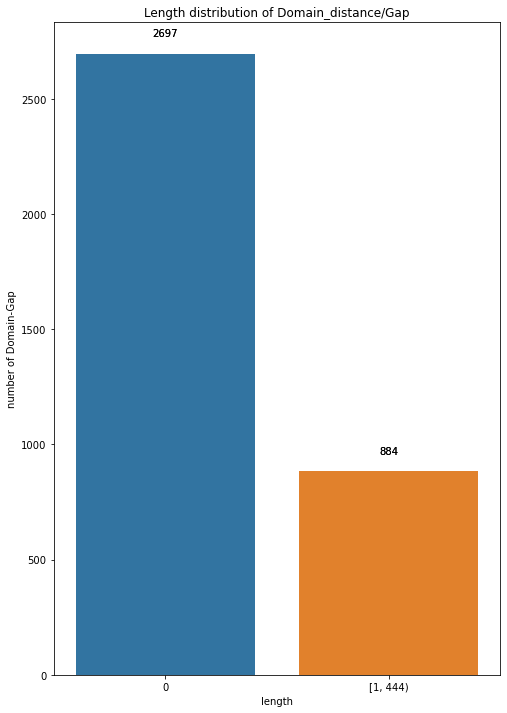

In [100]:
x = [u'0', u'[1, 444)']
y = [sum(dist==0), sum(dist>0)]
y_missing = [0, 179]
fig, ax = plt.subplots(figsize=(8, 12))
barchart = sns.barplot(x=x, y=y, ax=ax)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15, )

plt.title('Length distribution of Domain_distance/Gap')
plt.ylabel('number of Domain-Gap')
plt.xlabel('length')

In [131]:
# num of missing gaps
sum(df_domain_dist['missing'])

179

Text(0, 0.5, 'Length of Domain-Domain gap')

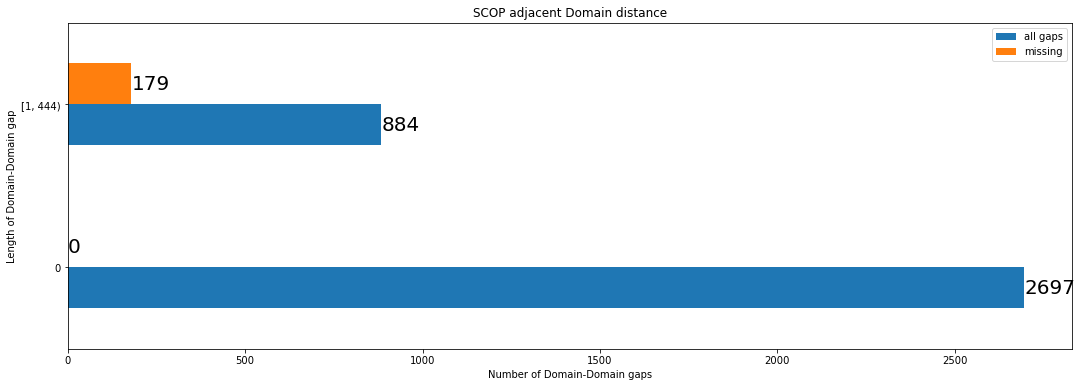

In [126]:
x = [u'0', u'[1, 444)']
y = [sum(dist==0), sum(dist>0)]
y_missing = [0, 179]
# index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'all gaps': y,'missing': y_missing})
df = df.set_axis(x)
ax = df.plot.barh(figsize=(18,6))
# ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0], fontsize=20)
ax.bar_label(ax.containers[1], fontsize=20)

ax.set_title('SCOP adjacent Domain distance')
ax.set_xlabel('Number of Domain-Domain gaps')
ax.set_ylabel('Length of Domain-Domain gap')

In [127]:
ax.figure.savefig(os.path.join('plots/domain_dist.png'), dpi=300, format='png', bbox_inches='tight')

#### 2.1.2. Gaps > 0

In [133]:
dist_1_44 = dist[dist>0]
len(dist_1_44)

884

([<matplotlib.axis.XTick at 0x7fc4d2ad9550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

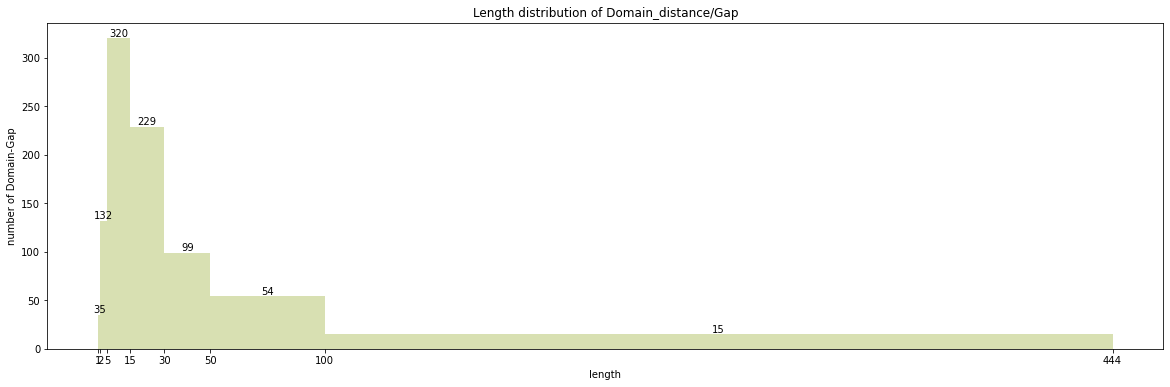

In [134]:
cls = [np.round(np.random.rand(),1), np.round(np.random.rand(),1),np.round(np.random.rand(),1), np.round(np.clip(np.random.rand(), 0, 1), 1)]
plt.figure(figsize=(20, 6))
bin_boundaries = [1, 2, 5, 15, 30, 50, 100, 444]

counts, edges, bars = plt.hist(dist_1_44, bins=bin_boundaries, color=cls)
plt.title('Length distribution of Domain_distance/Gap')
plt.ylabel('number of Domain-Gap')
plt.xlabel('length')
plt.bar_label(bars)
plt.xticks(edges)

# plt.text(80, 500, 'Inter-Domain Linkers')

In [138]:
# number of missing gaps based on the bin boundaries
missing_of_bin = [sum(df_domain_dist[df_domain_dist['dist']<=i]['missing'].values) for i in bin_boundaries]
missing_of_bin = np.array(missing_of_bin[1:]) - np.array(missing_of_bin[:-1])
missing_of_bin

array([ 5, 36, 92, 25,  9,  8,  2])

Text(0, 0.5, 'Length of Domain-Domain gap')

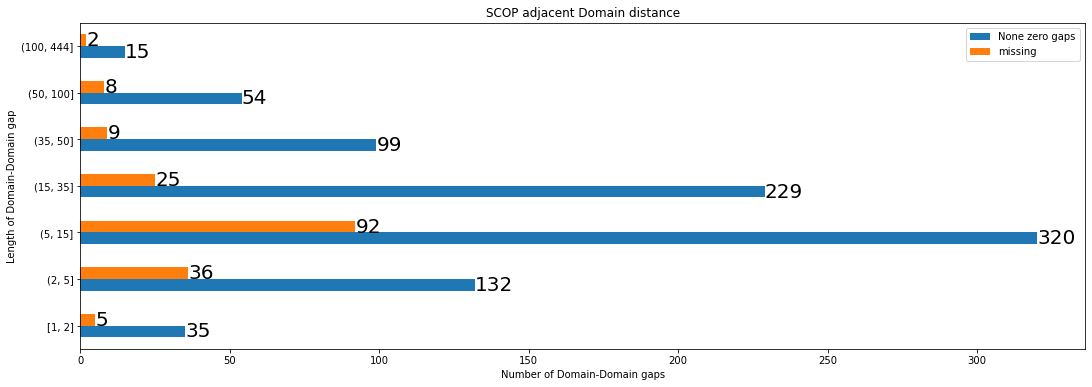

In [144]:
str_bin_boundaries = [str(x) for x in bin_boundaries]

x = [u'[1, 2]', u'(2, 5]', u'(5, 15]', u'(15, 35]', u'(35, 50]', u'(50, 100]', u'(100, 444]']
y = counts
y_missing = missing_of_bin
# index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'None zero gaps': y,'missing': y_missing})
df = df.set_axis(x)
ax = df.plot.barh(figsize=(18,6))
# ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0], fontsize=20)
ax.bar_label(ax.containers[1], fontsize=20)

ax.set_title('SCOP adjacent Domain distance')
ax.set_xlabel('Number of Domain-Domain gaps')
ax.set_ylabel('Length of Domain-Domain gap')

In [151]:
ax.figure.savefig(os.path.join('plots/domain_dist_1_444.png'), dpi=300, format='png', bbox_inches='tight')

### 2.2. Gaps without missing residues

In [158]:
df_gap = df_domain_dist[df_domain_dist['dist']==0]
df_gap_none_miss = df_gap[df_gap['missing']==0]
df_gap_none_miss

,pdbid,chainid,domain1,domain2,start,end,dist,missing
1,1A0I,A,8024205,8029580,-1,-1,0,0
3,1A21,A,8055100,8055494,-1,-1,0,0
4,1A3Q,A,8027852,8054870,-1,-1,0,0
6,1A5J,A,8002310,8002311,-1,-1,0,0
7,1A65,A,8028309,8028311,-1,-1,0,0
...,...,...,...,...,...,...,...,...
3576,7REQ,B,8031467,8031724,-1,-1,0,0
3577,8RUC,A,8023025,8031296,-1,-1,0,0
3578,9WGA,A,8025642,8025644,-1,-1,0,0
3579,9WGA,A,8025644,8025647,-1,-1,0,0


In [154]:
len(df_gap_none_miss.groupby('pdbid').groups.keys())

522